In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(6,6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df=pd.read_csv("spam.csv", encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3689,ham,What happen dear tell me,NaN,NaN,NaN
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...,NaN,NaN,NaN
393,ham,Yes i think so. I am in office but my lap is i...,NaN,NaN,NaN
1610,ham,I'll probably be around mu a lot,NaN,NaN,NaN
3560,spam,Text BANNEDUK to 89555 to see! cost 150p texto...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [ ]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.columns.tolist()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [11]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4155,ham,"Yo, call me when you get the chance, a friend ..."
1616,ham,"K, makes sense, btw carlos is being difficult ..."
620,ham,Dear we got &lt;#&gt; dollars hi hi
4842,ham,I need details about that online job.
2646,ham,"Em, its olowoyey@ usc.edu have a great time in..."


In [13]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1318,ham,Ok...
644,ham,Allo! We have braved the buses and taken on th...
5017,ham,Babe ! What are you doing ? Where are you ? Wh...
3098,ham,Ok... I din get ur msg...
2845,ham,Wat time u finish ur lect today?


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df['target']=encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# check for duplicated values
df.duplicated().sum()

403

In [22]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

## 2. EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

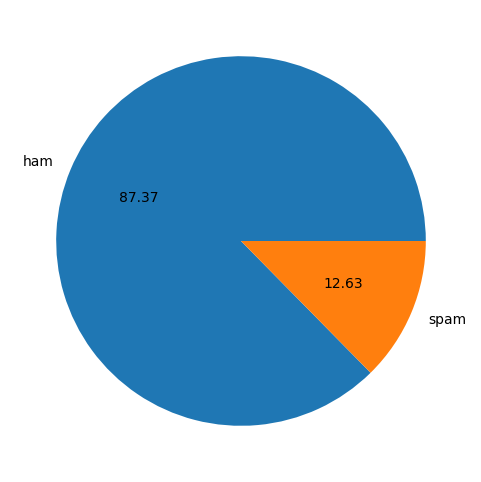

In [34]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
# data is inbalanced

In [36]:
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
df['num_characters']=df['text'].apply(len)
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\225104716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [48]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [51]:
df.drop(['num_sentence'],axis=1,inplace=True)

In [52]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [55]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

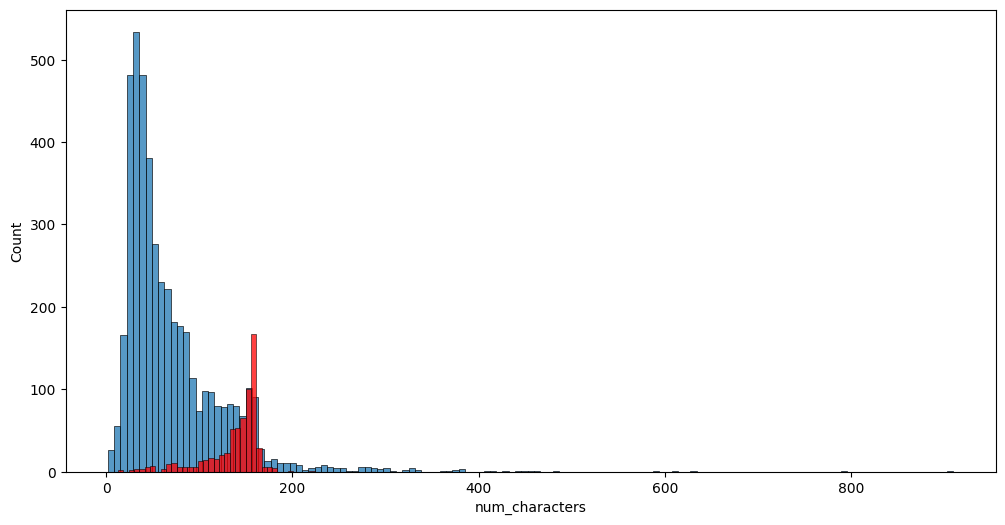

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

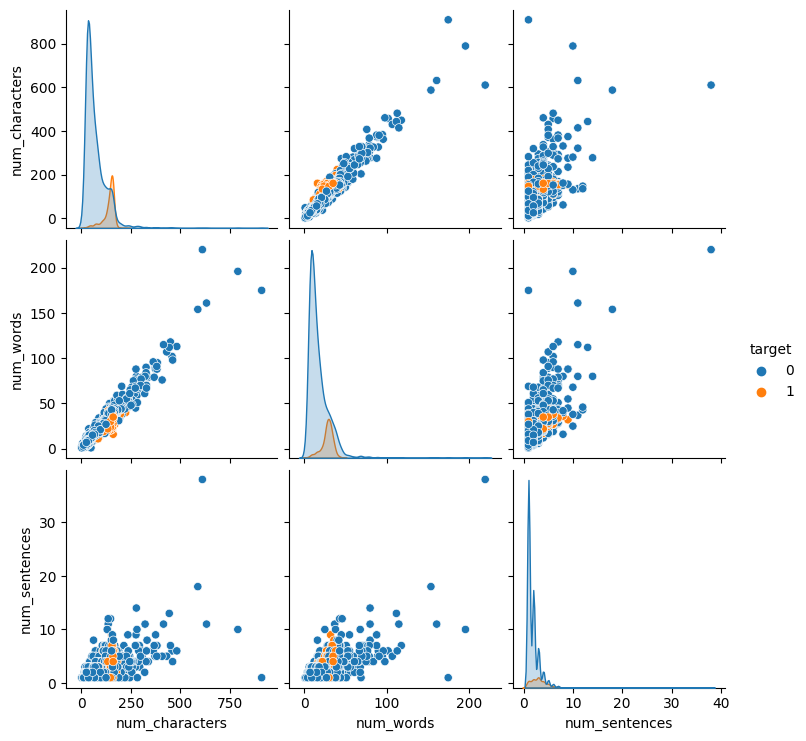

In [57]:
sns.pairplot(df,hue='target')

In [63]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

<Axes: >

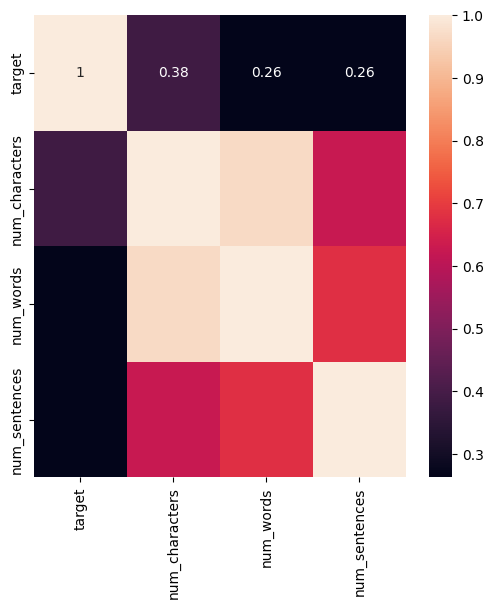

In [73]:
sns.heatmap(corr_matrix,annot=True)

### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [ ]:
# from nltk.corpus import stopwords
# stopwords.words('english')

# import string
# string.punctuation

In [90]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# stemmed_word = ps.stem('dancing')
# stemmed_word

In [98]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
            

In [99]:
df['transformed_text'] = df['text'].apply(transform_text)

In [101]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [107]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

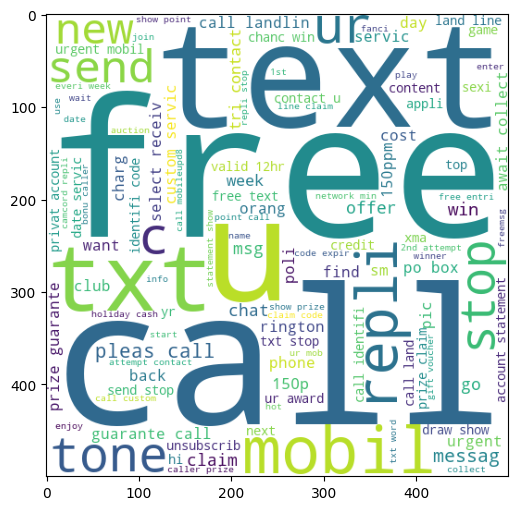

In [109]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [111]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

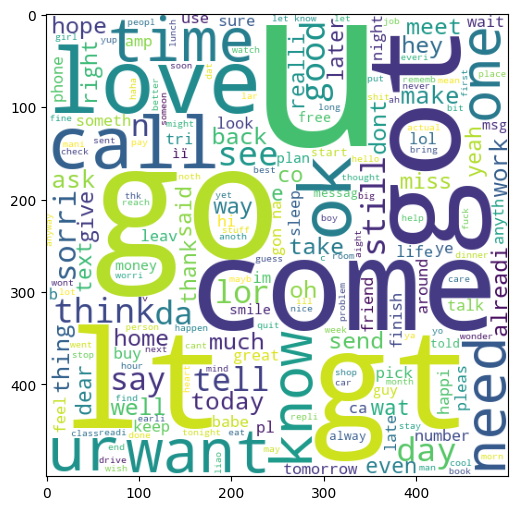

In [112]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [113]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [114]:
len(spam_corpus)

9939

In [122]:
from collections import Counter
common_words_spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30))

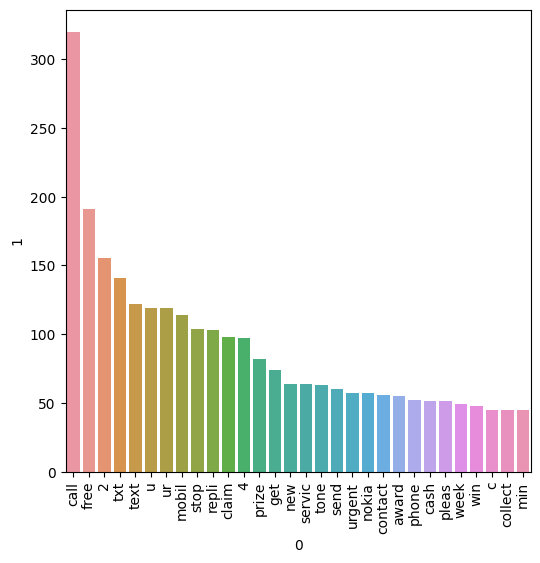

In [123]:
sns.barplot(x=0 ,y=1 , data=common_words_spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:
common_words_ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [127]:
len(ham_corpus)

35404

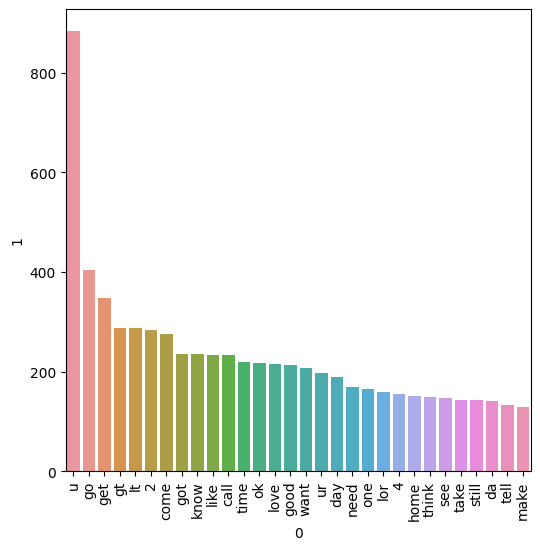

In [128]:
sns.barplot(x=0 ,y=1 , data=common_words_ham_df)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [173]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [174]:
x.shape

(5169, 6708)

In [175]:
y=df['target'].values

In [176]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [178]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [179]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [181]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [182]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [269]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [199]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [238]:
# # appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [270]:
Y = df['target'].values

In [271]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [272]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [273]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [274]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [260]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [245]:
# tfidf --> MNB

In [246]:
# try more algorithms

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [248]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [249]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [250]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [251]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [168]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [169]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [170]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


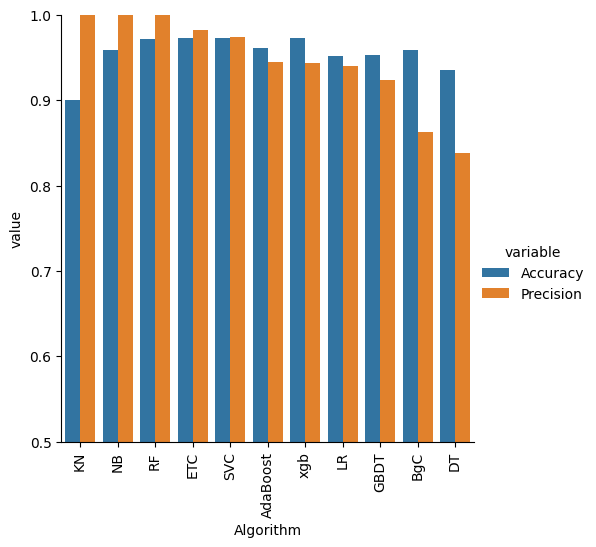

In [171]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdfb

In [233]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [235]:
new_performance_df=performance_df.merge(temp_df1,on='Algorithm')
new_performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [213]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [216]:
new_df_scaled = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [236]:
new_performance_scaled=new_performance_df.merge(new_df_scaled,on=['Algorithm','Accuracy','Precision'])
new_performance_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [252]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
final_df=new_performance_scaled.merge(temp_df,on='Algorithm')

In [253]:
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.932302,0.814815
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [261]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [262]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [263]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [264]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [265]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [266]:
from sklearn.ensemble import StackingClassifier

In [267]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [268]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [275]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))